Import required libaries

In [346]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then we insert all the required connection properties

In [347]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=SASISARATH;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

Now we create the cursor

In [348]:
cursor = conn.cursor()

Here we define what query we want executed in the database

In [349]:
# Writen a query from AdventureWorks Database2019
query = 'SELECT * FROM Tradingduration_vs_Revenue'
query2 = 'SELECT * FROM road_area'
query3 = 'SELECT category_shops, AVG(AnnualRevenue) AS avg_rev FROM touring_sqf GROUP BY category_shops;'
query4 = 'SELECT * FROM Mountain_Specality'

Here we assign the resulting table returned from the database as a variable 'salesdata'. 
This is also where our connection actually runs using the defined properties and query above

In [350]:
# Connection of AdventureWorks Database2019 Query with Python file to generate different DataFrames
revenue_store = pd.read_sql(query, conn)
rev_road = pd.read_sql(query2, conn)
touring_rev = pd.read_sql(query3, conn)
mountain_rev = pd.read_sql(query4, conn)

C:\Users\Sasi\AppData\Local\Temp\ipykernel_19320\2740239847.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  revenue_store = pd.read_sql(query, conn)


C:\Users\Sasi\AppData\Local\Temp\ipykernel_19320\2740239847.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rev_road = pd.read_sql(query2, conn)
C:\Users\Sasi\AppData\Local\Temp\ipykernel_19320\2740239847.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  touring_rev = pd.read_sql(query3, conn)
C:\Users\Sasi\AppData\Local\Temp\ipykernel_19320\2740239847.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mountain_rev = pd.read_sql(query4, conn)


Let's get a preview of what our data looks like:

In [351]:
# Display of overall average AnnualRevenue, Avg_revenue for Road, Avg_revenue for Touring,Avg_revenue for Mountain
print(revenue_store.head())
print(rev_road.head())
print(touring_rev.head())
print(mountain_rev.head())

   avg_Revenue  Trading_durations  YearOpened
0   45789.4736                 49        1970
1  115789.4736                 48        1971
2  171578.9473                 47        1972
3   30000.0000                 46        1973
4  222000.0000                 45        1974
   YearOpened  avg_Revenue  Trading_durations
0        1970      42500.0                 49
1        1971     112500.0                 48
2        1972     140000.0                 47
3        1973      30000.0                 46
4        1974     187500.0                 45
  category_shops      avg_rev
0    Large_shops  285000.0000
1   Medium_shops  150000.0000
2    Small_shops   90105.2631
   number_shops_opened  Trading_durations  avg_Revenue
0                    5                 49   30000.0000
1                    4                 48  112500.0000
2                    9                 47  217777.7777
3                    2                 46   30000.0000
4                    9                 45  216666.666

Correlation coefficient between AVG_Revenue and Trading_duration: -0.2214020713988652


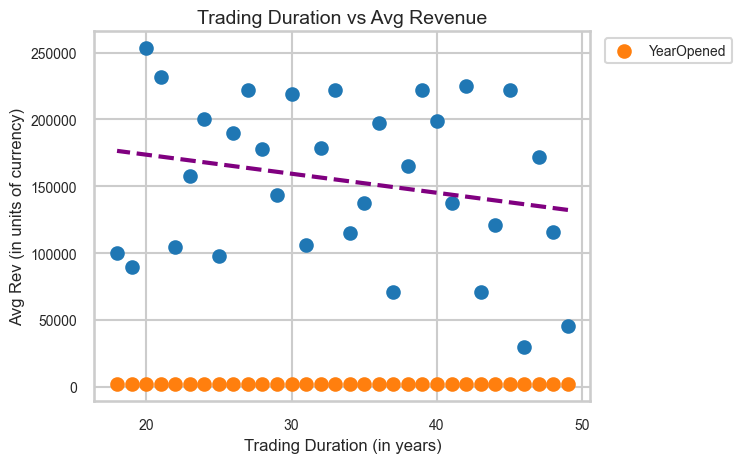

In [386]:
#Correlation coefficient between AVG_AnnualRevenue and Trading_duration
correlation_coefficient_Duration_revenue = np.corrcoef(revenue_store['avg_Revenue'], revenue_store['Trading_durations'])[0, 1]
print("Correlation coefficient between AVG_Revenue and Trading_duration:", correlation_coefficient_Duration_revenue)
# Scatter plot results for overall_store with thier Average AnnualRevenue

plt.scatter(revenue_store.Trading_durations, revenue_store.avg_Revenue)
plt.scatter(revenue_store["Trading_durations"], rev_road["YearOpened"],marker="o", label="YearOpened")
# Calculate the equation for the linear trendline
z = np.polyfit(revenue_store.Trading_durations, revenue_store.avg_Revenue, 1)
p = np.poly1d(z)

# Add the trendline to the plot
plt.plot(revenue_store.Trading_durations, p(revenue_store.Trading_durations), color="purple", linewidth=3, linestyle="--")
plt.xlabel('Trading Duration (in years)', fontsize =12)
plt.ylabel('Avg Rev (in units of currency)', fontsize =12)
plt.title('Trading Duration vs Avg Revenue',fontsize =14)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right',fontsize= 10, bbox_to_anchor=(1.3, 1), prop={'size': 10}, markerscale=1)
plt.show()


Correlation coefficient between AVG_Revenue and Trading_duration: -0.31310506350718553


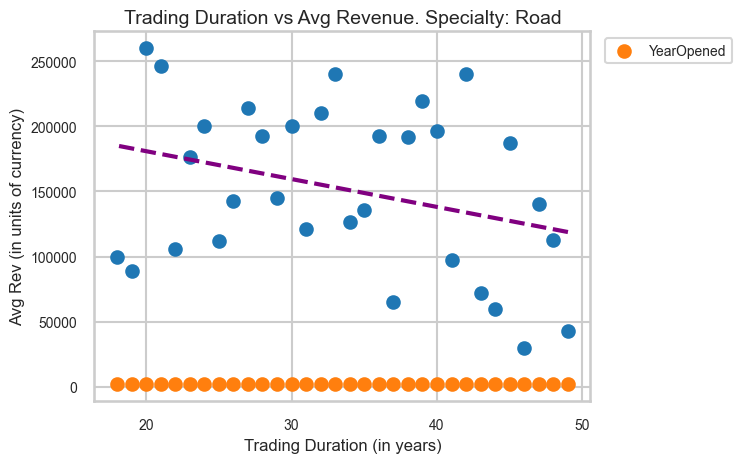

In [383]:
#Correlation coefficient between AVG_AnnualRevenue and Trading_duration
correlation_coefficient_Duration_revenue = np.corrcoef(rev_road['avg_Revenue'], rev_road['Trading_durations'])[0, 1]
print("Correlation coefficient between AVG_Revenue and Trading_duration(Road):", correlation_coefficient_Duration_revenue)

# Scatter Plot relationship between AVG_AnnualRevenue and Trading_duration(Specialty=Road)
plt.scatter(rev_road["Trading_durations"], rev_road["avg_Revenue"])
plt.scatter(rev_road["Trading_durations"], rev_road["YearOpened"],marker="o", label="YearOpened")
z = np.polyfit(rev_road.Trading_durations, rev_road.avg_Revenue, 1)
p = np.poly1d(z)

# Add the trendline to the plot
plt.plot(rev_road.Trading_durations, p(rev_road.Trading_durations), color="purple", linewidth=3, linestyle="--")
plt.xlabel('Trading Duration (in years)',fontsize=12)
plt.ylabel('Avg Rev (in units of currency)',fontsize=12)
plt.title("Trading Duration vs Avg Revenue. Specialty: Road",fontsize =14)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right',fontsize= 10, bbox_to_anchor=(1.3, 1), prop={'size': 10}, markerscale=1)
plt.show()

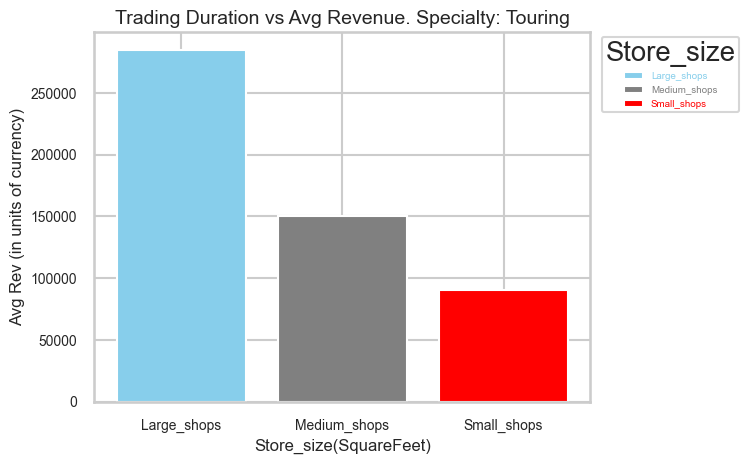

In [358]:

colors = {'Large_shops': 'SkyBlue', 'Medium_shops': 'grey', 'Small_shops': 'red'}
bars = plt.bar(touring_rev['category_shops'], touring_rev['avg_rev'], color=[colors[code] for code in touring_rev['category_shops']])
plt.title('Trading Duration vs Avg Revenue. Specialty: Touring',fontsize =14)
plt.xlabel('Store_size(SquareFeet)',fontsize=12)
plt.ylabel('Avg Rev (in units of currency)',fontsize=12)
legend_labels = touring_rev['category_shops']
legend_colors = [colors[code] for code in touring_rev['category_shops']]
plt.legend(bars, legend_labels, title='Store_size', loc='upper right', bbox_to_anchor=(1.31, 1), prop={'size': 7}, markerscale=0.3, labelcolor=legend_colors)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Correlation coefficient between AVG_Revenue and Trading_duration: -0.17068899564744963


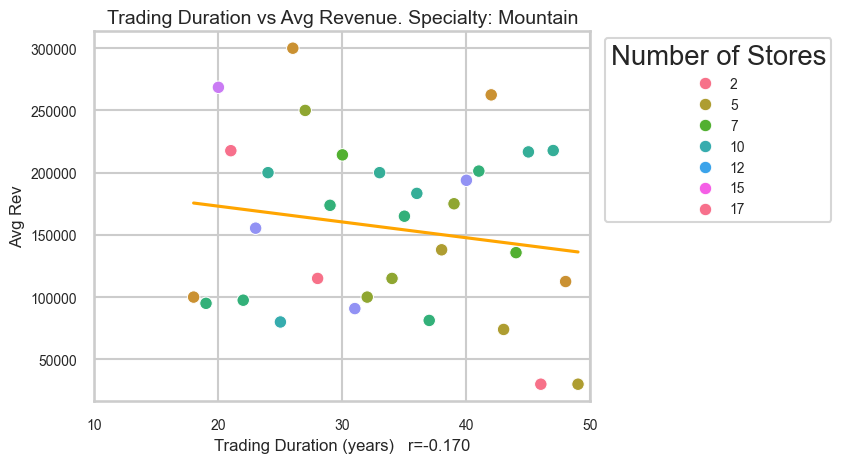

In [377]:
#Correlation coefficient between AVG_AnnualRevenue and Trading_duration(Mountain)
correlation_coefficient_Duration_revenue = np.corrcoef(mountain_rev['avg_Revenue'], mountain_rev['Trading_durations'])[0, 1]
print("Correlation coefficient between AVG_Revenue and Trading_duration(Mountain):", correlation_coefficient_Duration_revenue)
# importing seaborn library
import seaborn as sns
#  Specialty: Mountain
sns.set_style('whitegrid')
sns.color_palette()
sns.set_context('talk', font_scale=1.1)
sns.scatterplot(data=mountain_rev, x='Trading_durations', y='avg_Revenue', hue='number_shops_opened', palette='husl')
plt.xlabel('Trading Duration (years)   r=-0.170', fontsize=12)
plt.ylabel('Avg Rev', fontsize = 12)
plt.xlim(10,50)
plt.title('Trading Duration vs Avg Revenue Specialty: Mountain',fontsize =14)
plt.legend(loc='upper right',fontsize= 8, bbox_to_anchor=(1.5, 1), prop={'size': 10}, markerscale=1, title='Number of Stores')
m1,b=np.polyfit(mountain_rev.Trading_durations, mountain_rev.avg_Revenue,1)
plt.plot(mountain_rev.Trading_durations,m1*mountain_rev.Trading_durations+b, color='orange')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()